In [12]:
from helper import*
import params as cfg
import sys

In [13]:
#  import csv

dfM = pd.read_csv('/Users/joshuaighalo/Downloads/music2.csv')
dfC = pd.read_csv('/Users/joshuaighalo/Downloads/control2.csv')

In [17]:
dfC = dfC[['RAW_TP9','RAW_AF7','RAW_AF8','RAW_TP10']]
c = singleTransformToRawEEG(dfC,1024,120,'resample')
eeg,time = c[0],c[1]

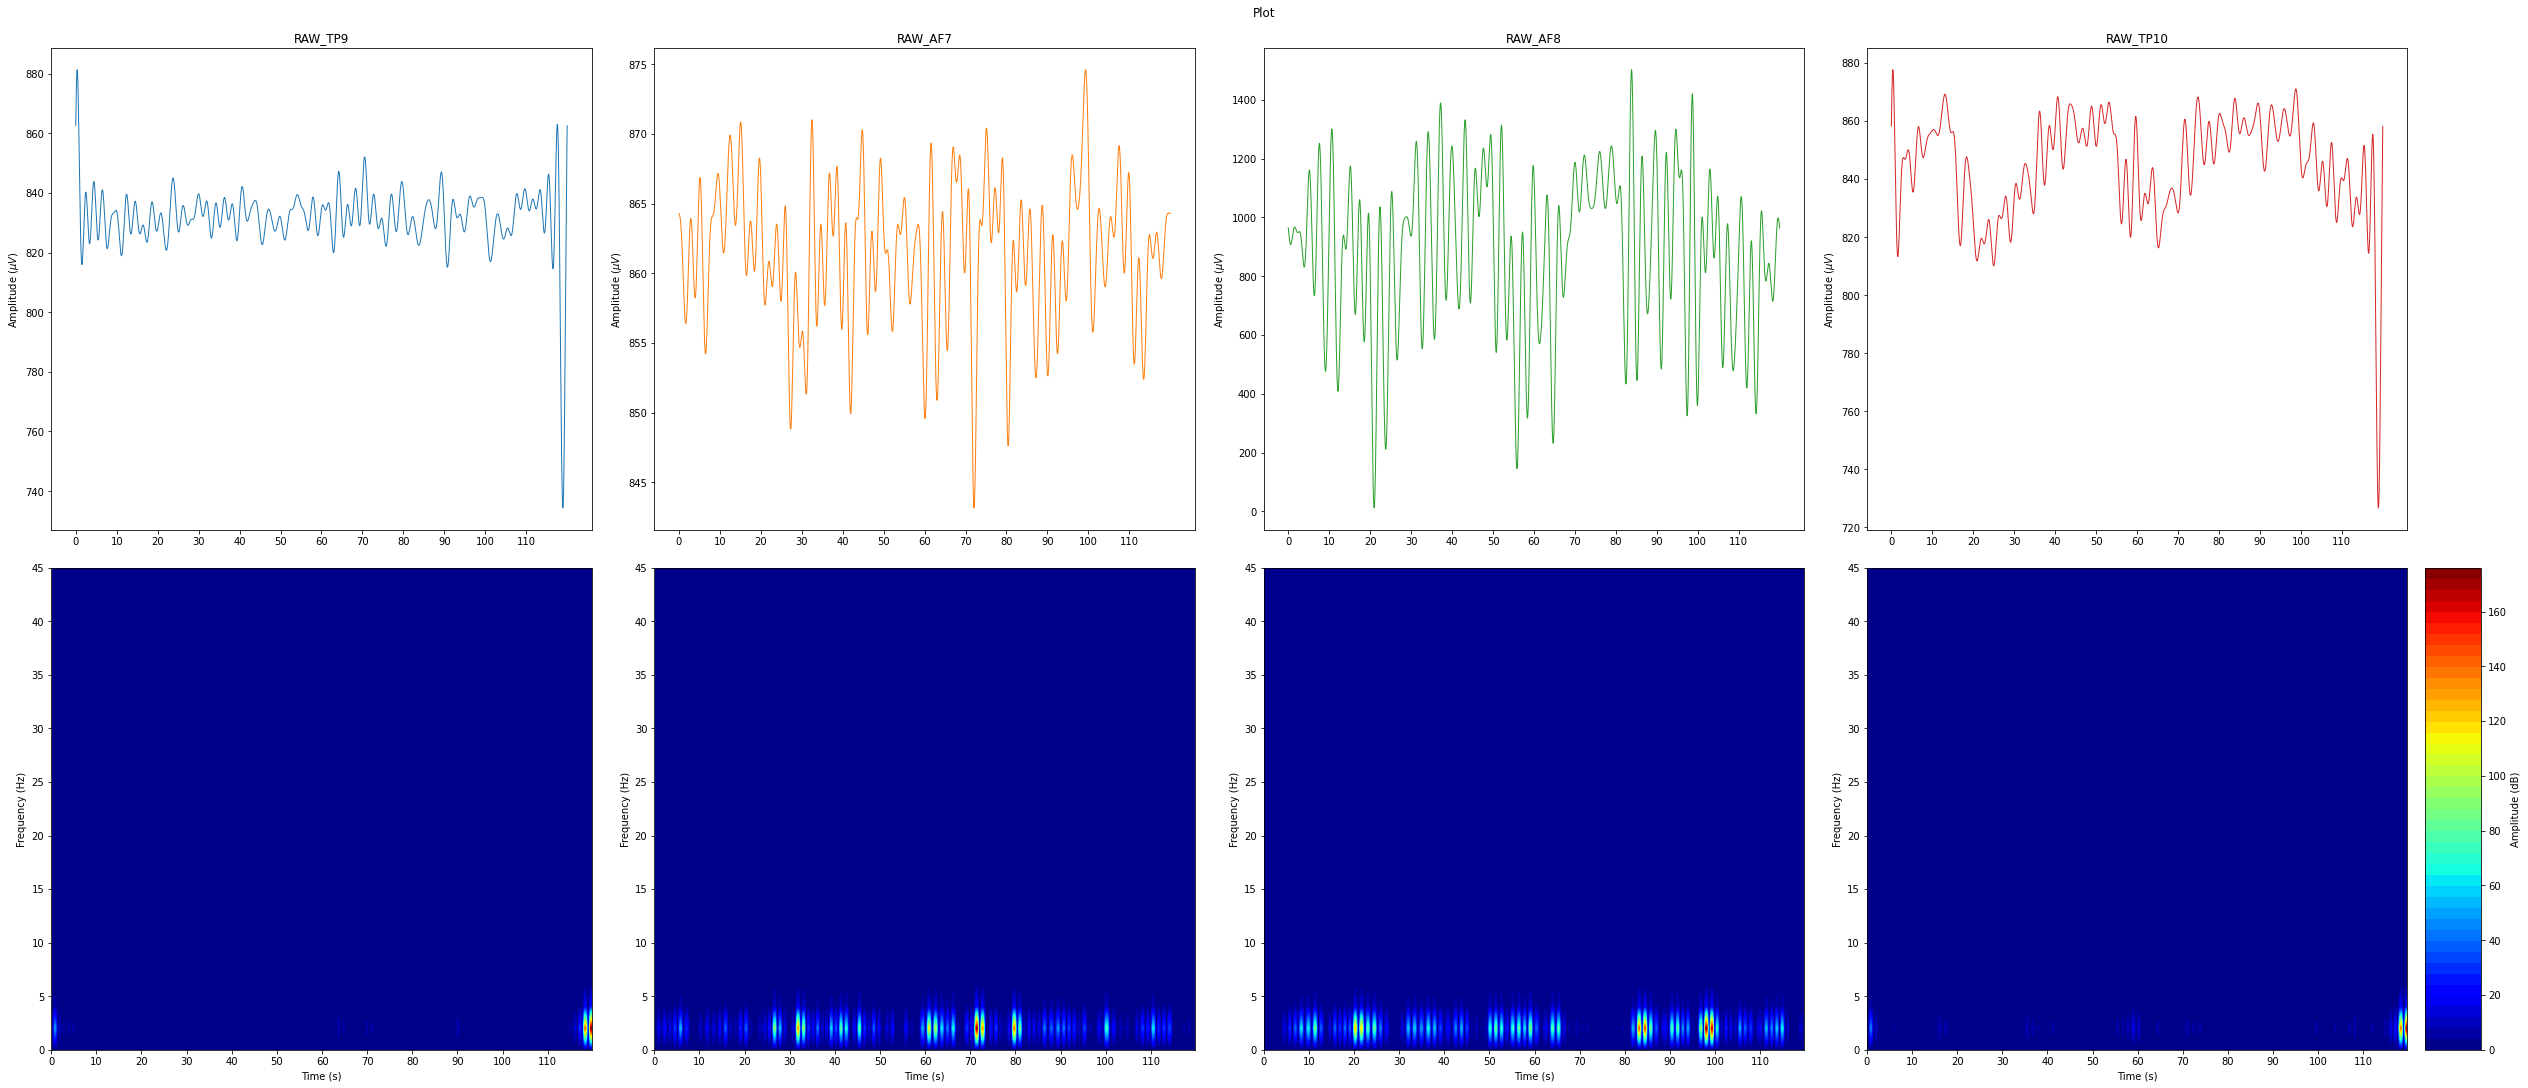

In [19]:
plots(data=eeg,time_s=time,fs=1024,figsize=[35,15],subTitles=['RAW_TP9','RAW_AF7','RAW_AF8','RAW_TP10'],
          title='Plot',tickRange=[0,120],timeFrequencyDomainPlots=True)

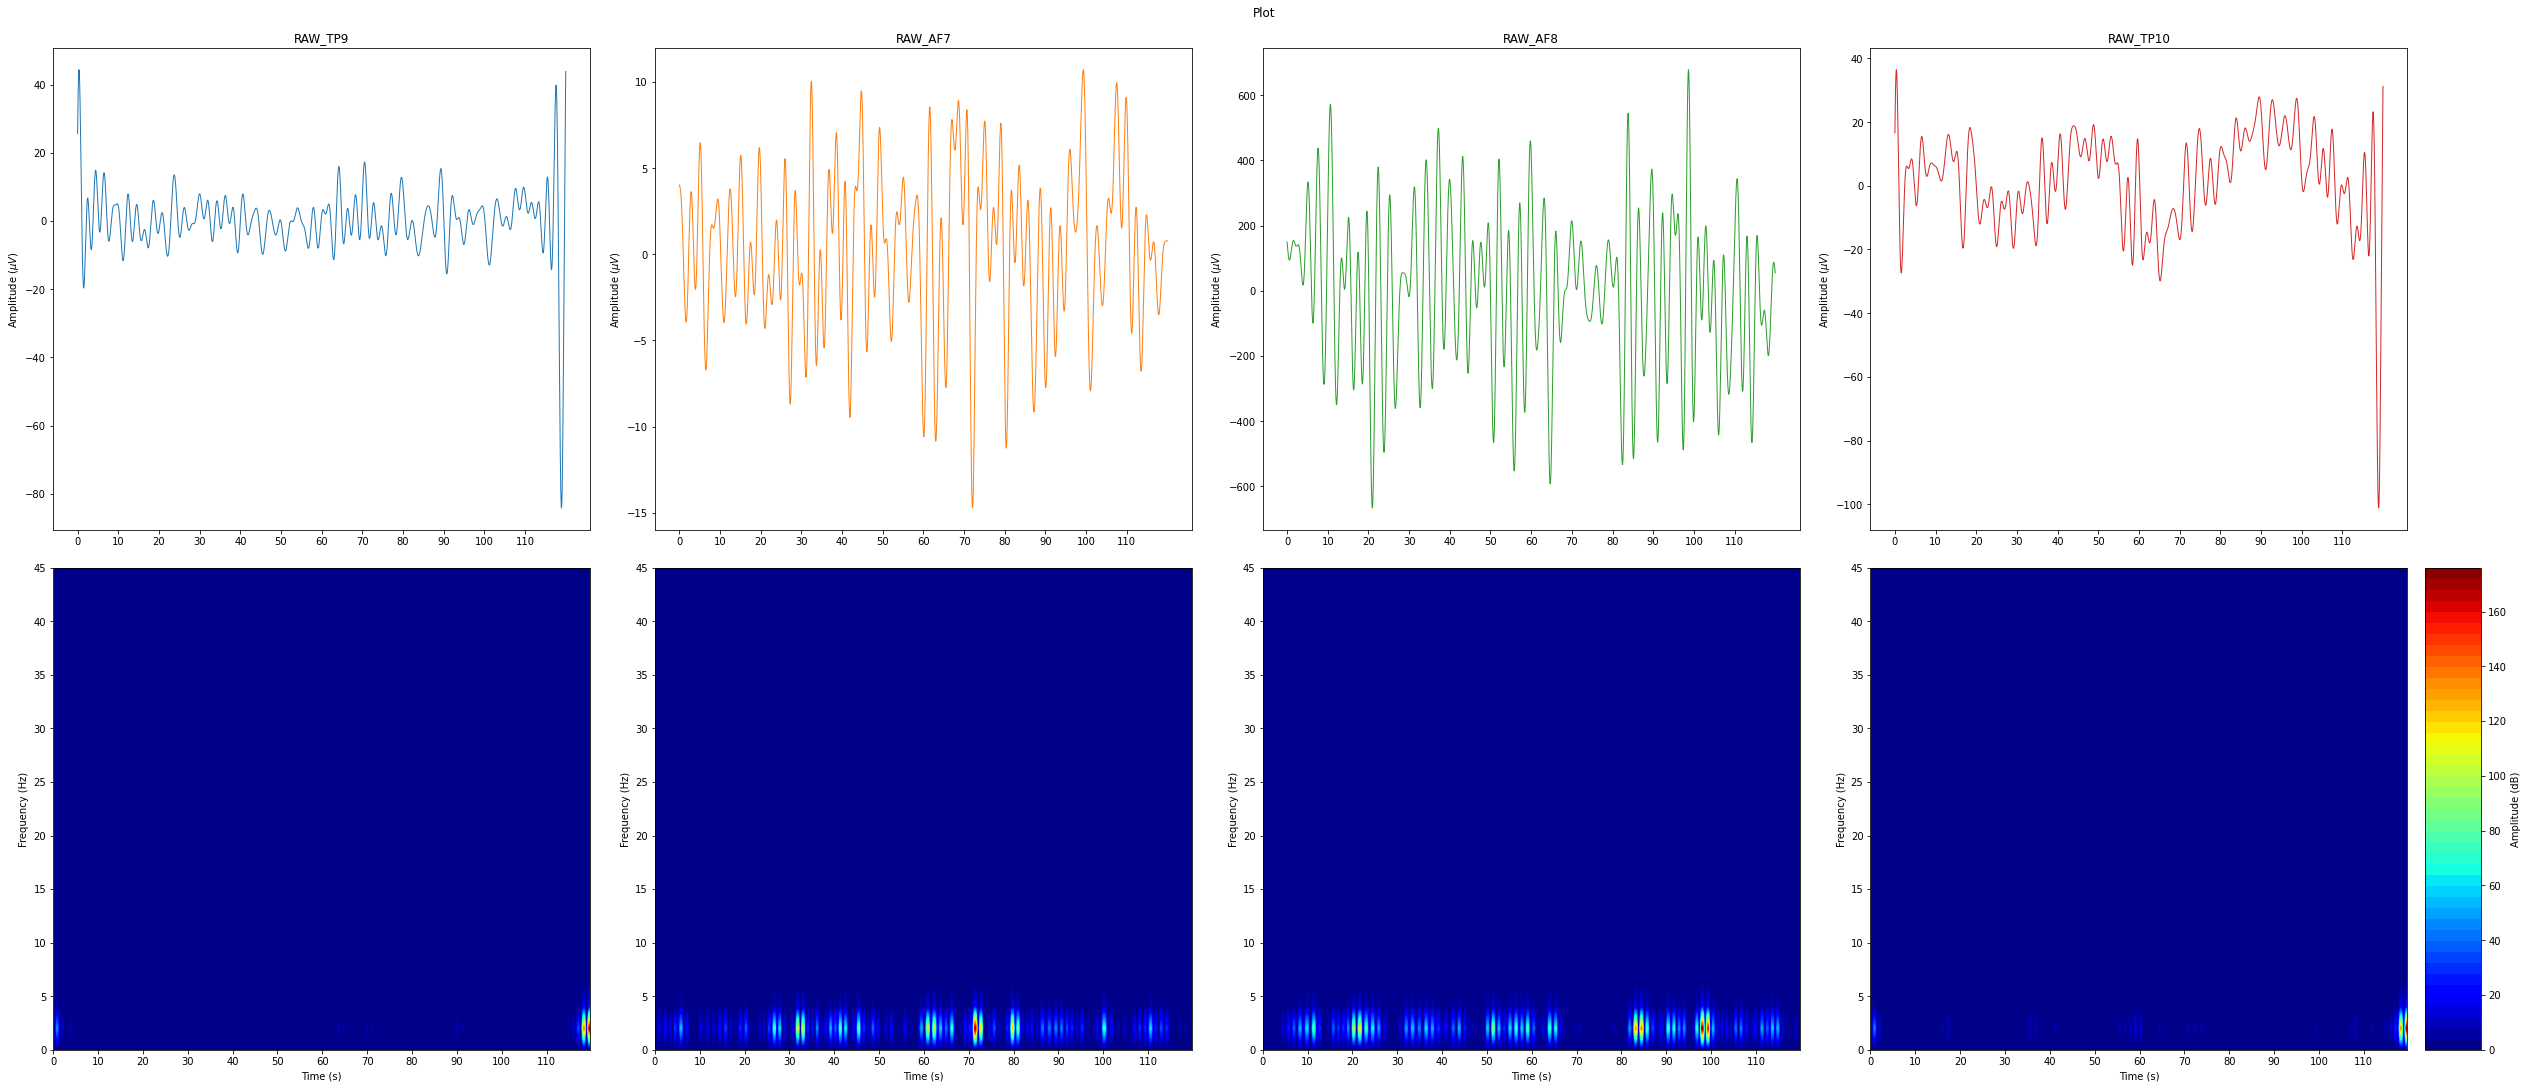

In [21]:
def EMD(eeg,imfp):
    import emd
    imfTP9 = emd.sift.sift(eeg[:,0])
    imfAF7 = emd.sift.sift(eeg[:,1])
    imfAF8 = emd.sift.sift(eeg[:,2])
    imfTP10 = emd.sift.sift(eeg[:,3])
    sigTP9 = np.sum(imfTP9[:,imfp],axis=1)
    sigTP10 = np.sum(imfTP10[:,imfp],axis=1)
    sigAF7 = np.sum(imfAF7[:,imfp],axis=1)
    sigAF8 = np.sum(imfAF8[:,imfp],axis=1)
    nsignal = np.vstack((sigTP9,sigAF7,sigAF8,sigTP10)).T
    return nsignal

newsignal_1 = EMD(eeg,[0,1,3])

plots(data=newsignal_1,time_s=time,fs=1024,figsize=[35,15],subTitles=['RAW_TP9','RAW_AF7','RAW_AF8','RAW_TP10'],
          title='Plot',tickRange=[0,120],timeFrequencyDomainPlots=True)

<b> TASK 2: T1 v T2

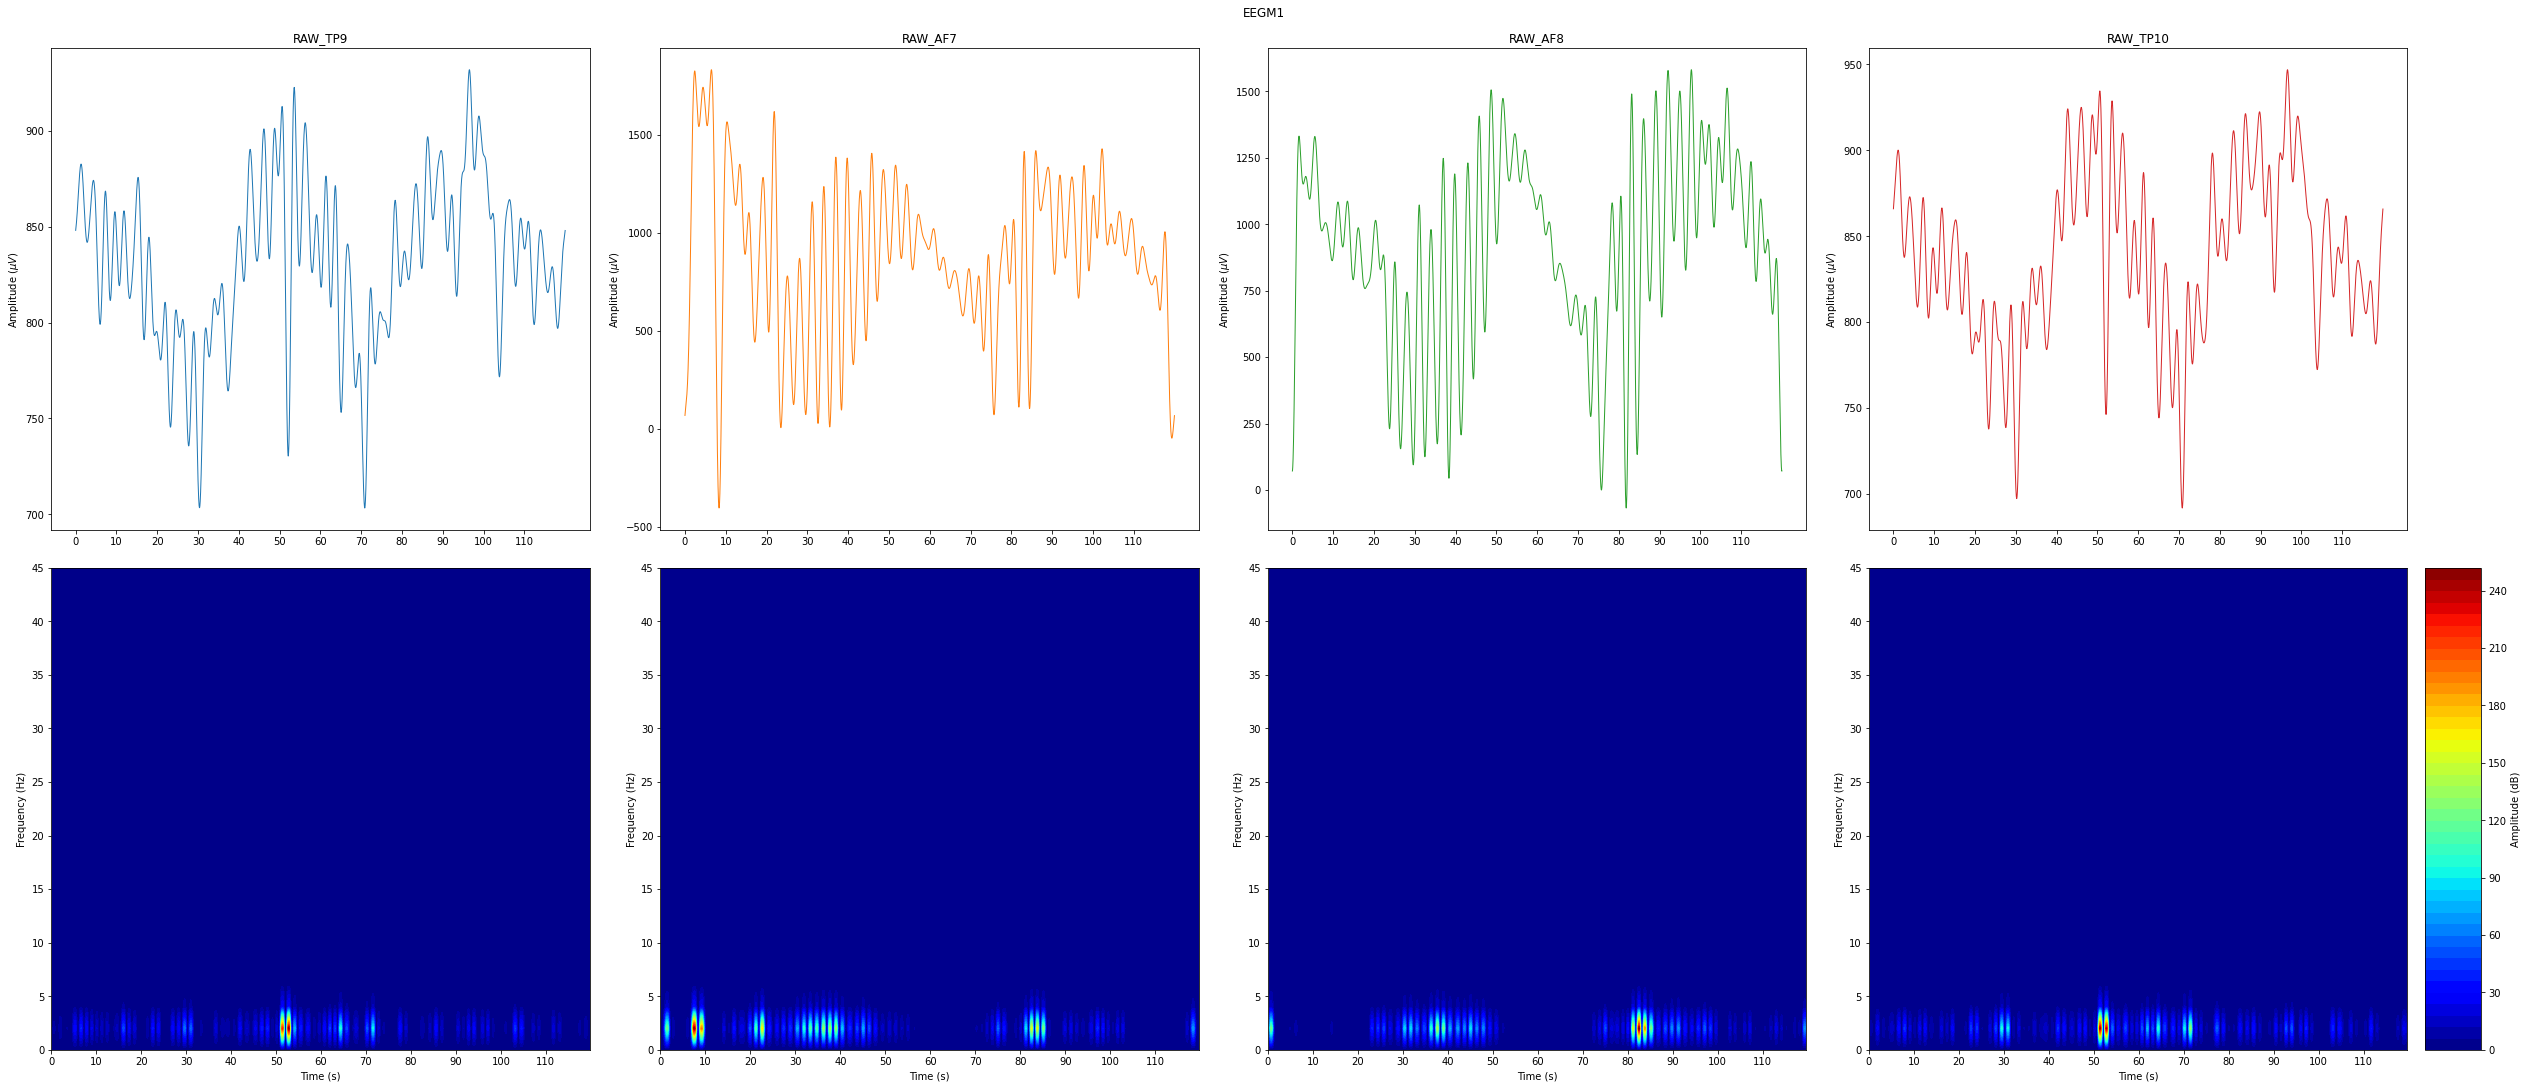

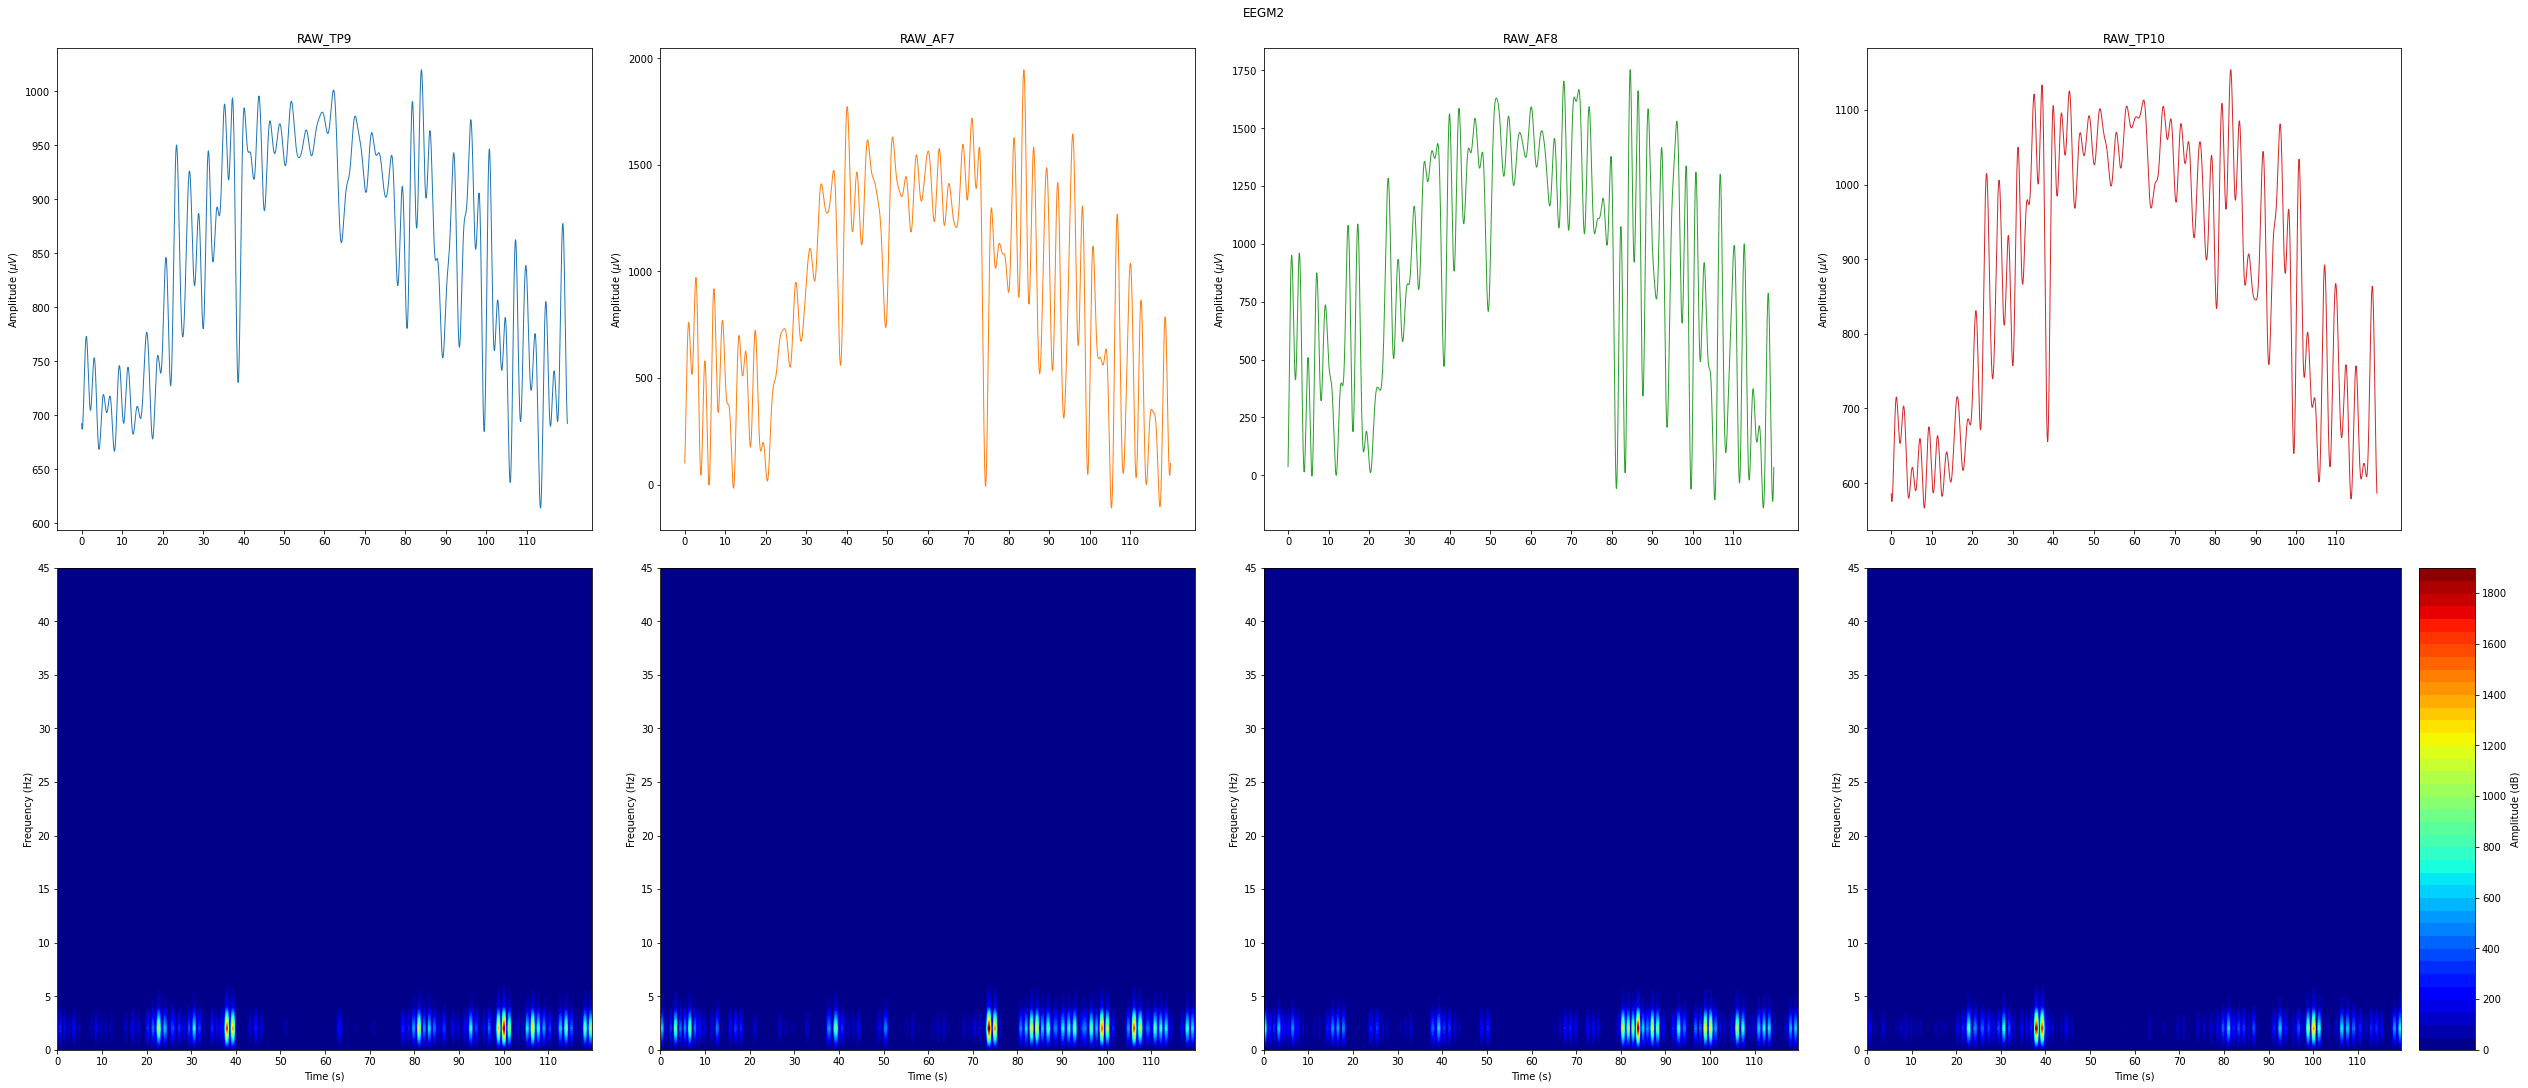

In [6]:
dfM1 = pd.read_csv('/Users/joshuaighalo/Downloads/Mind_Monitor 2/ME1T2.csv')
dfM2 = pd.read_csv('/Users/joshuaighalo/Downloads/Mind_Monitor 2/ME2T2.csv')
dfM1 = dfM1[['RAW_TP9','RAW_AF7','RAW_AF8','RAW_TP10']]
dfM1 = singleTransformToRawEEG(dfM1,256,120,'resample')
dfM2 = dfM2[['RAW_TP9','RAW_AF7','RAW_AF8','RAW_TP10']]
dfM2 = singleTransformToRawEEG(dfM2,256,120,'resample')
eegM1,time = dfM1[0],dfM1[1]
eegM2,time = dfM2[0],dfM2[1]
plots(data=eegM1,time_s=time,fs=256,figsize=[35,15],subTitles=['RAW_TP9','RAW_AF7','RAW_AF8','RAW_TP10'],
          title='EEGM1',tickRange=[0,120],timeFrequencyDomainPlots=True)
plots(data=eegM2,time_s=time,fs=256,figsize=[35,15],subTitles=['RAW_TP9','RAW_AF7','RAW_AF8','RAW_TP10'],
            title='EEGM2',tickRange=[0,120],timeFrequencyDomainPlots=True)

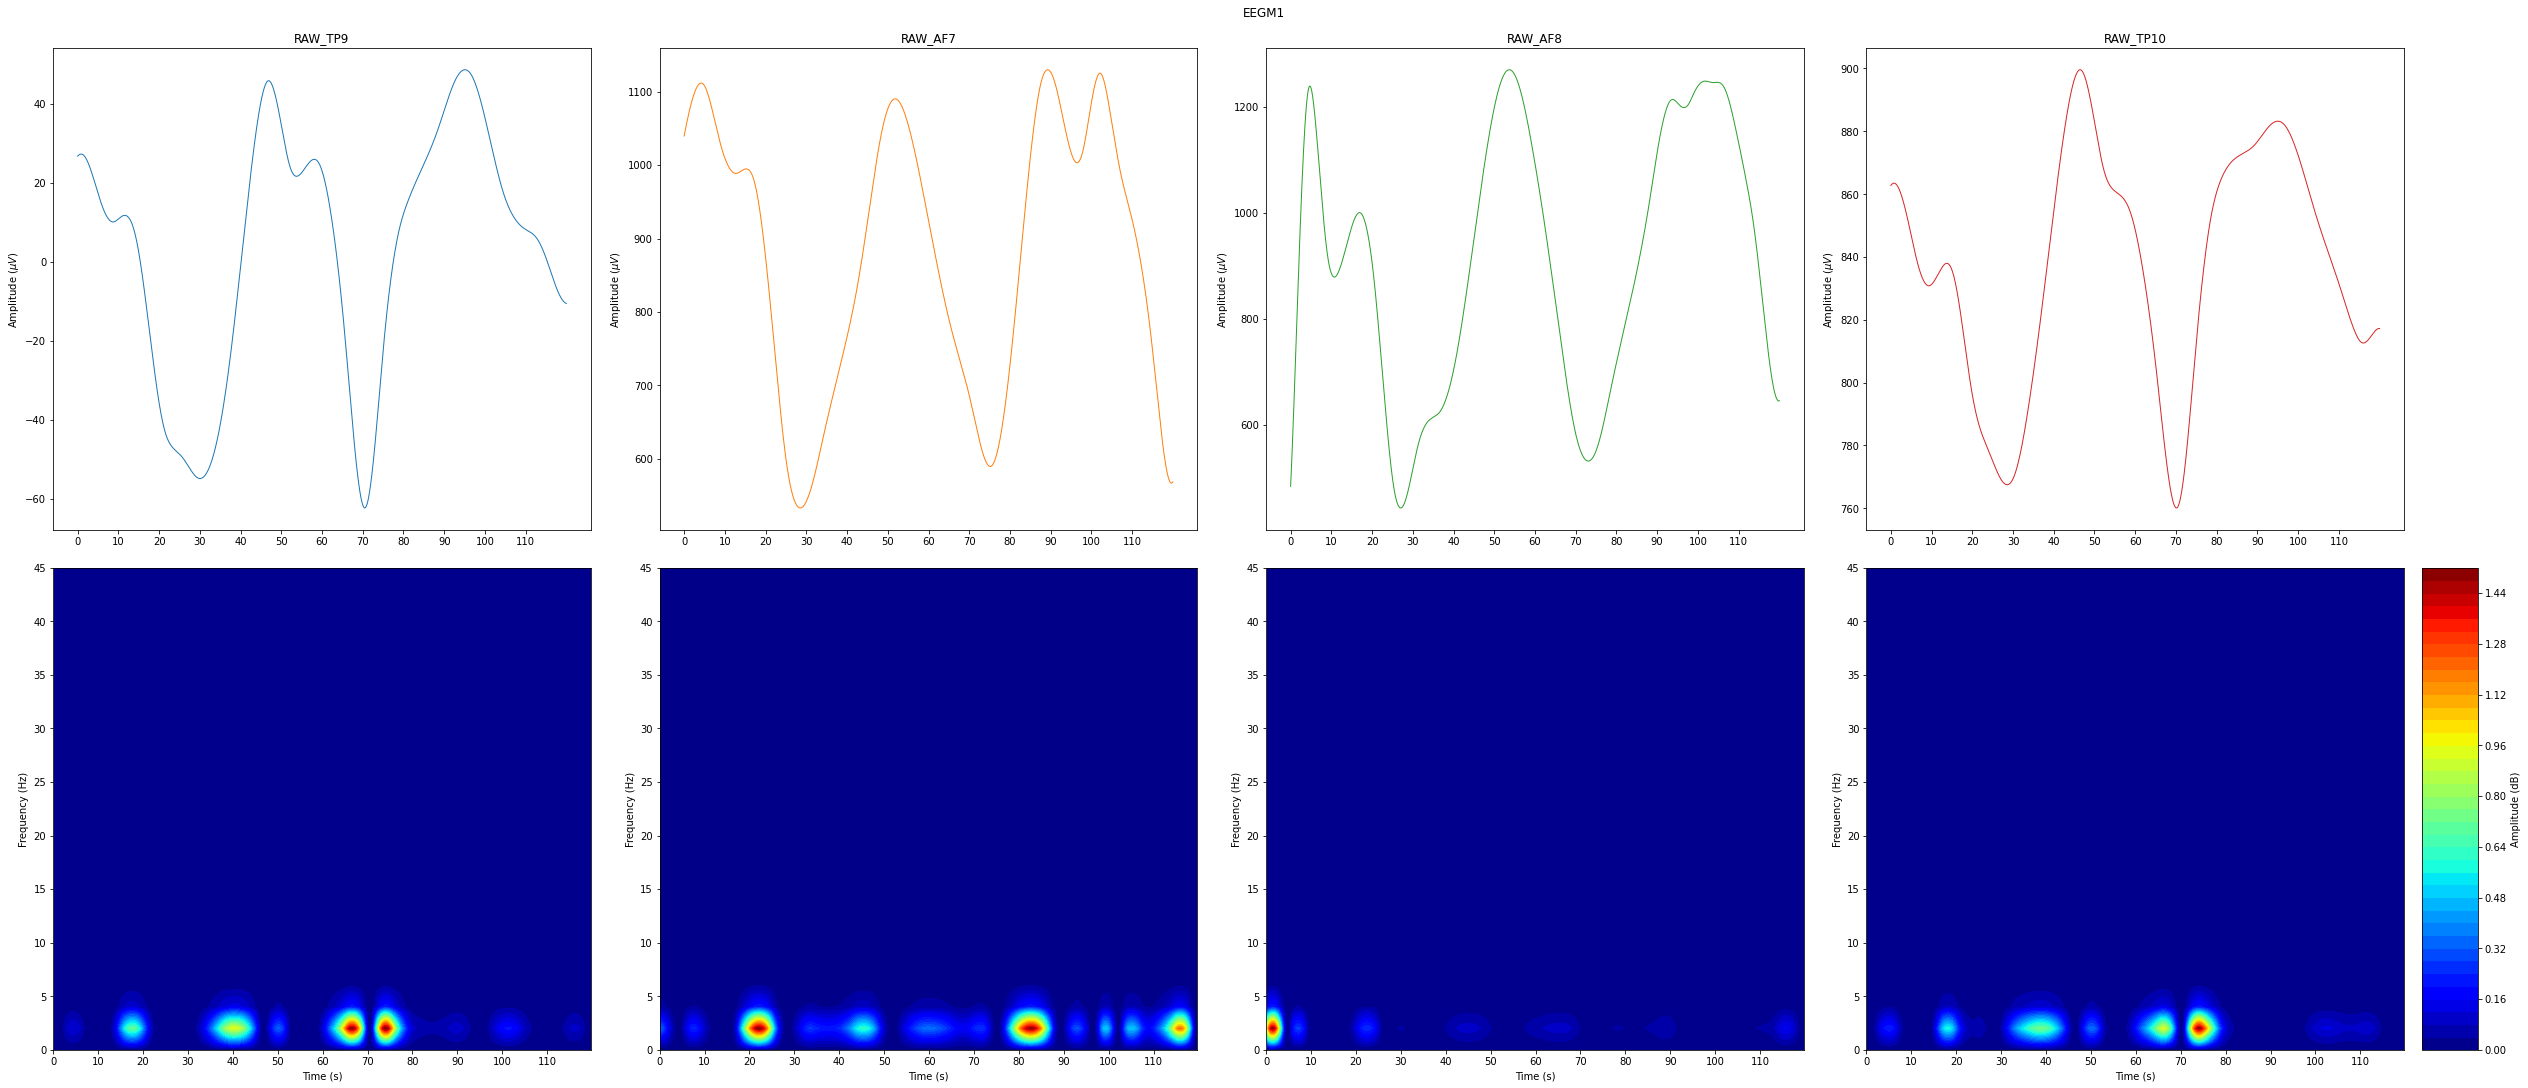

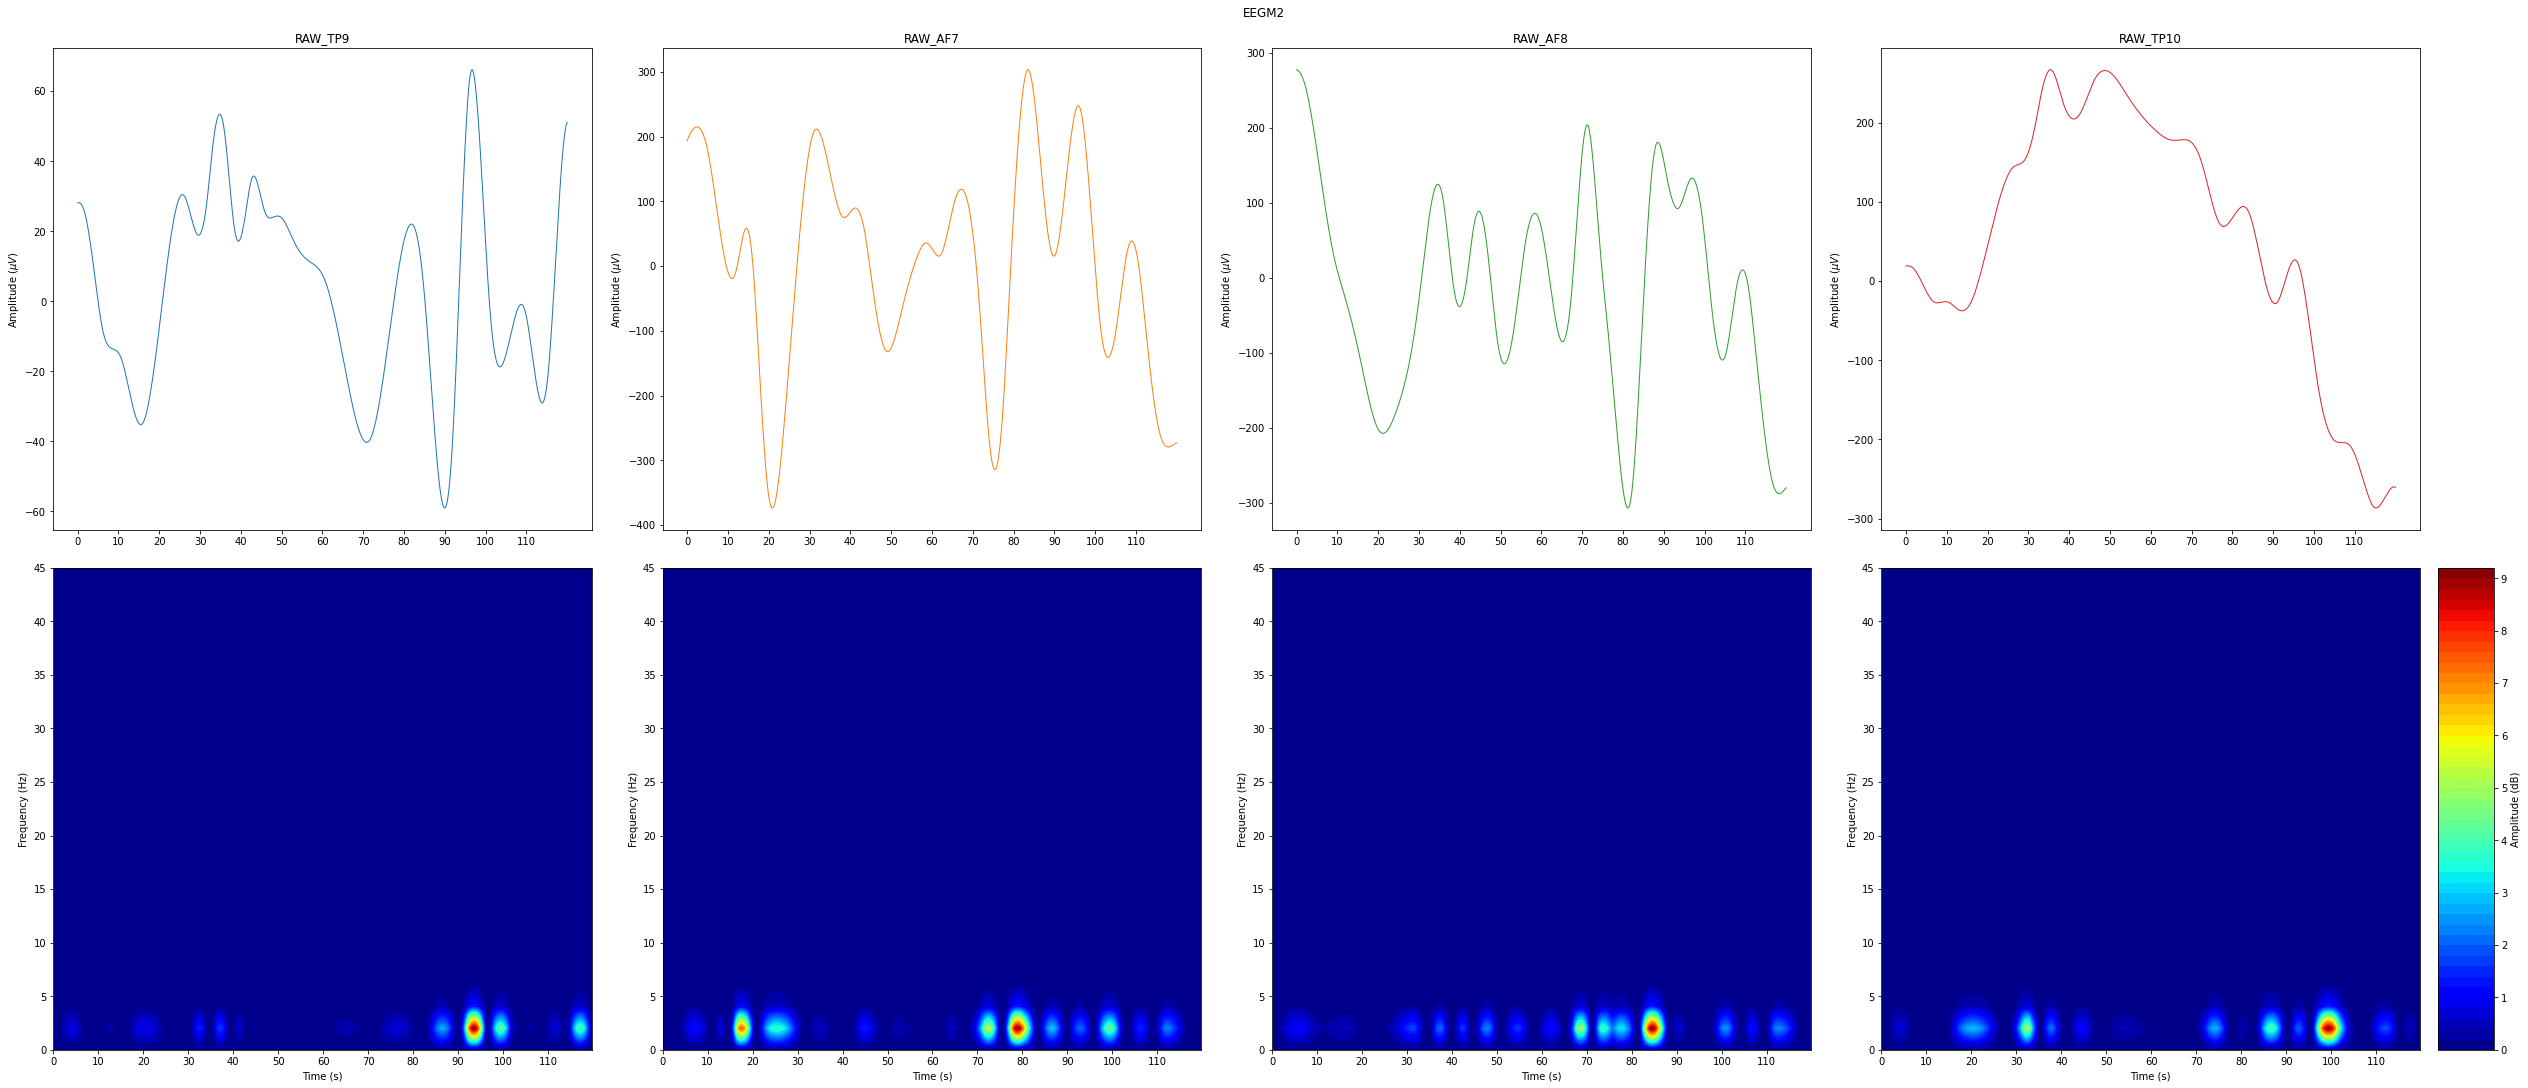

In [7]:
n_eegM1,n_eegM2 = EMD(eegM1,[2,3]),EMD(eegM2,[2,3])
plots(data=n_eegM1,time_s=time,fs=256,figsize=[35,15],subTitles=['RAW_TP9','RAW_AF7','RAW_AF8','RAW_TP10'],
            title='EEGM1',tickRange=[0,120],timeFrequencyDomainPlots=True)
plots(data=n_eegM2,time_s=time,fs=256,figsize=[35,15],subTitles=['RAW_TP9','RAW_AF7','RAW_AF8','RAW_TP10'],
            title='EEGM2',tickRange=[0,120],timeFrequencyDomainPlots=True)

In [8]:
m1_delta = avgBandPower(n_eegM1,256,0.5,4)
m2_delta = avgBandPower(n_eegM2,256,0.5,4)
m1_theta = avgBandPower(n_eegM1,256,4,8)
m2_theta = avgBandPower(n_eegM2,256,4,8)
m1_alpha = avgBandPower(n_eegM1,256,8,12)
m2_alpha = avgBandPower(n_eegM2,256,8,12)
m1_beta = avgBandPower(n_eegM1,256,12,30)
m2_beta = avgBandPower(n_eegM2,256,12,30)
m1_gamma = avgBandPower(n_eegM1,256,30,50)
m2_gamma = avgBandPower(n_eegM2,256,30,50)
print("Delta:",m1_delta,m2_delta)
print("Theta:",m1_theta,m2_theta)
print("Alpha:",m1_alpha,m2_alpha)
print("Beta:",m1_beta,m2_beta)
print("Gamma:",m1_gamma,m2_gamma)

Delta: [1.10499360e-05 4.97282559e+00 2.53527422e+00 1.10420166e-05] [ 0.02920197  6.7539865  17.36499393  2.20807457]
Theta: [5.34084567e-10 8.51069512e-08 1.22850694e-08 7.95846354e-10] [2.46641492e-10 8.37245548e-08 1.19705338e-07 3.08877524e-08]
Alpha: [1.77834118e-10 2.84340481e-08 4.00961163e-09 2.65513483e-10] [7.51059988e-11 2.79160740e-08 3.98542668e-08 1.02091890e-08]
Beta: [2.16309999e-10 3.45771408e-08 4.84409717e-09 3.22937018e-10] [9.07378095e-11 3.39471953e-08 4.84775143e-08 1.23814929e-08]
Gamma: [6.11327461e-11 9.77129464e-09 1.36537076e-09 9.12719487e-11] [2.55873508e-11 9.59379839e-09 1.37006004e-08 3.49544811e-09]


<b>Task 1: T1 v T2<b>

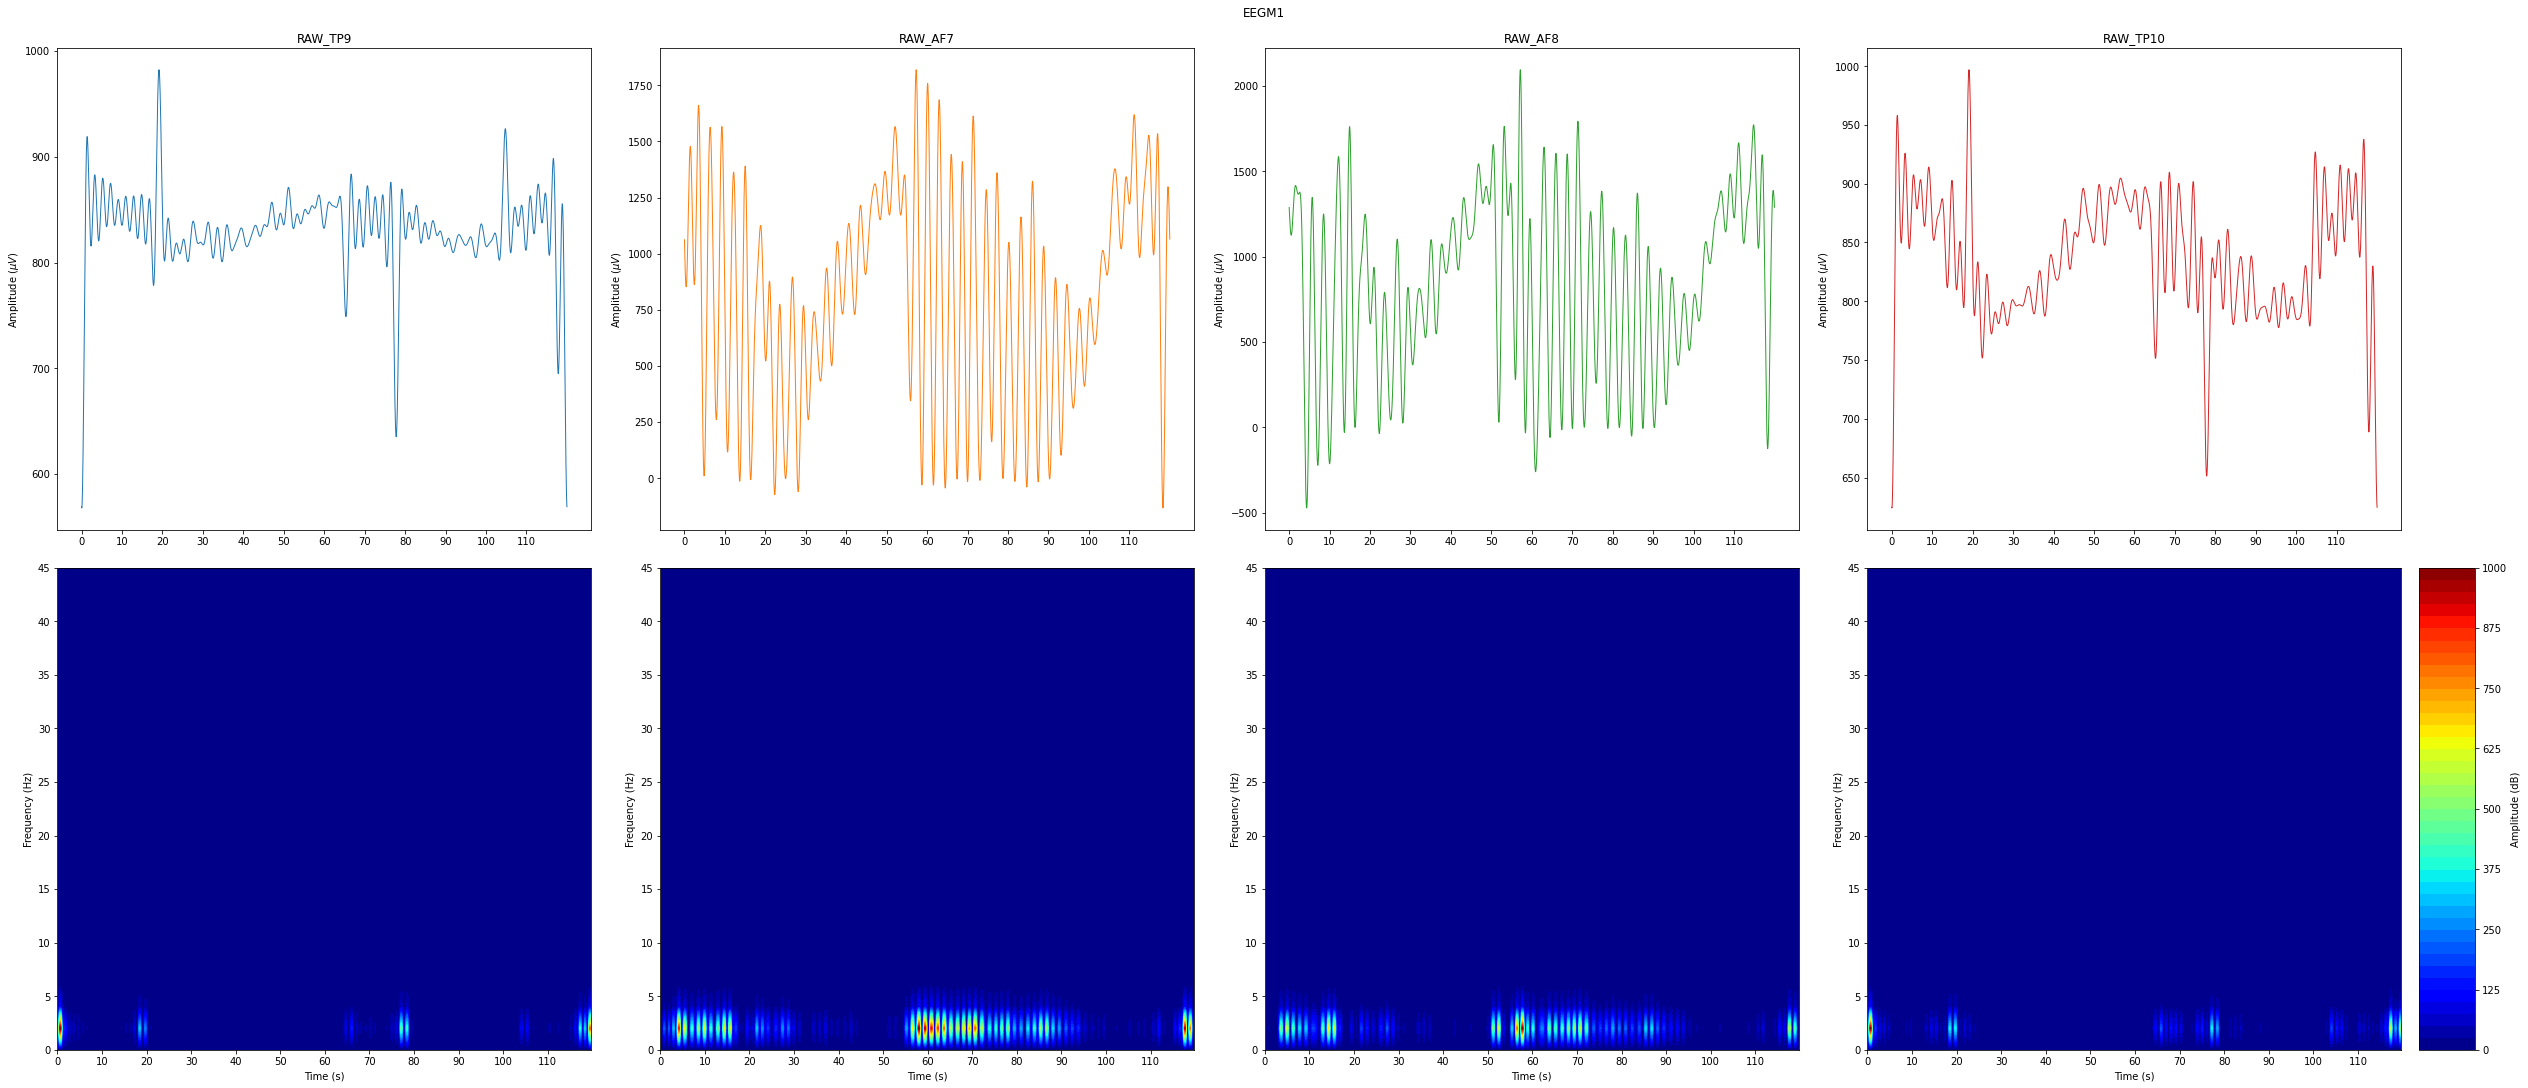

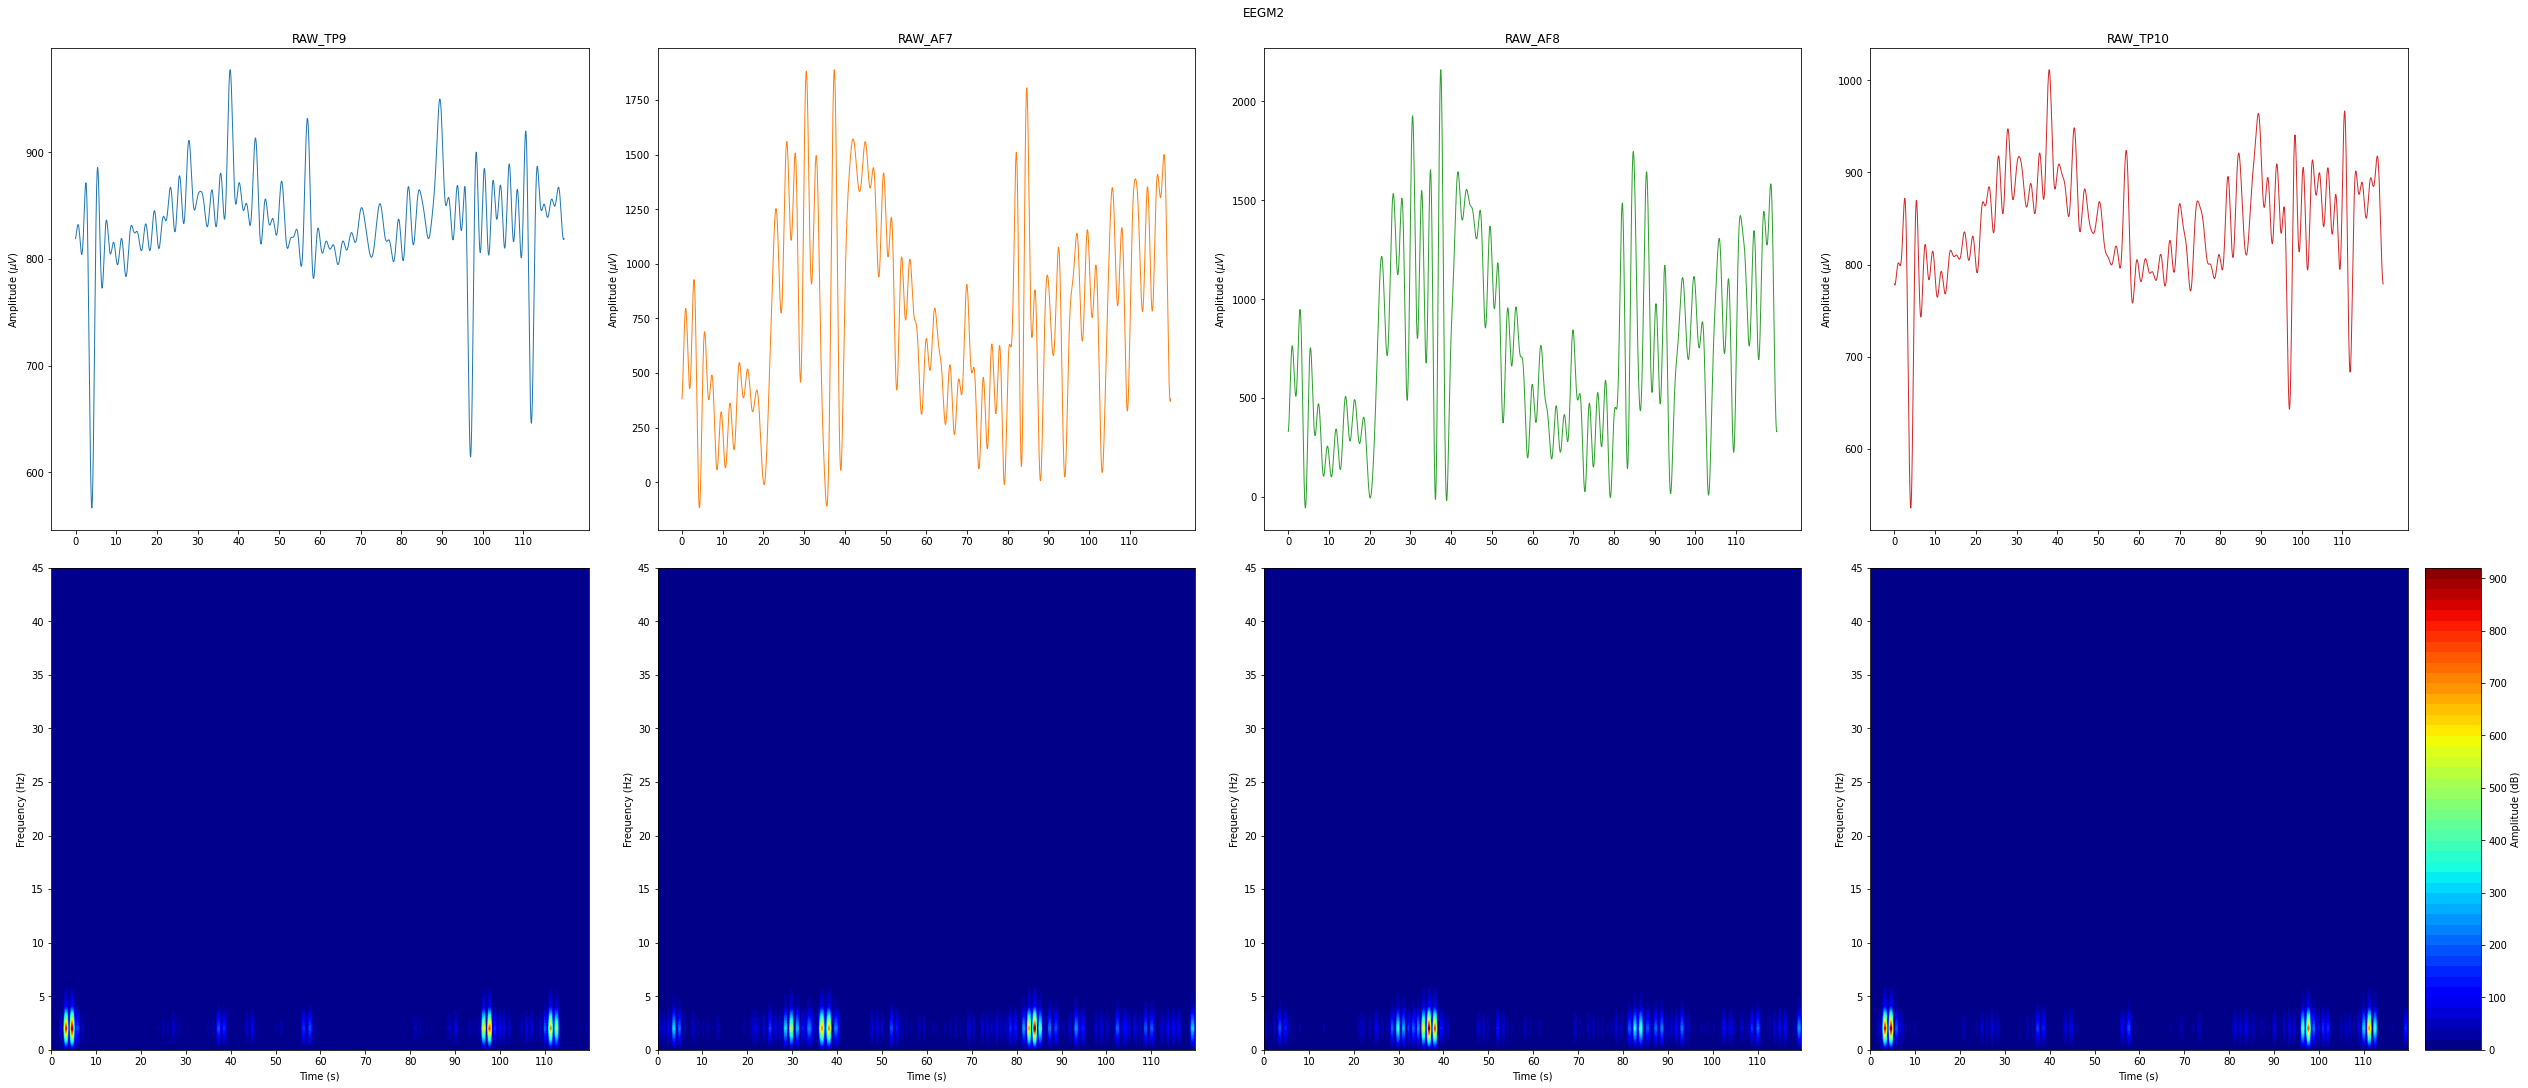

In [9]:
dfM1 = pd.read_csv('/Users/joshuaighalo/Downloads/Mind_Monitor 2/ME1T1.csv')
dfM2 = pd.read_csv('/Users/joshuaighalo/Downloads/Mind_Monitor 2/ME2T1.csv')
dfM1 = dfM1[['RAW_TP9','RAW_AF7','RAW_AF8','RAW_TP10']]
dfM1 = singleTransformToRawEEG(dfM1,256,120,'resample')
dfM2 = dfM2[['RAW_TP9','RAW_AF7','RAW_AF8','RAW_TP10']]
dfM2 = singleTransformToRawEEG(dfM2,256,120,'resample')
eegM1,time = dfM1[0],dfM1[1]
eegM2,time = dfM2[0],dfM2[1]
plots(data=eegM1,time_s=time,fs=256,figsize=[35,15],subTitles=['RAW_TP9','RAW_AF7','RAW_AF8','RAW_TP10'],
          title='EEGM1',tickRange=[0,120],timeFrequencyDomainPlots=True)
plots(data=eegM2,time_s=time,fs=256,figsize=[35,15],subTitles=['RAW_TP9','RAW_AF7','RAW_AF8','RAW_TP10'],
            title='EEGM2',tickRange=[0,120],timeFrequencyDomainPlots=True)

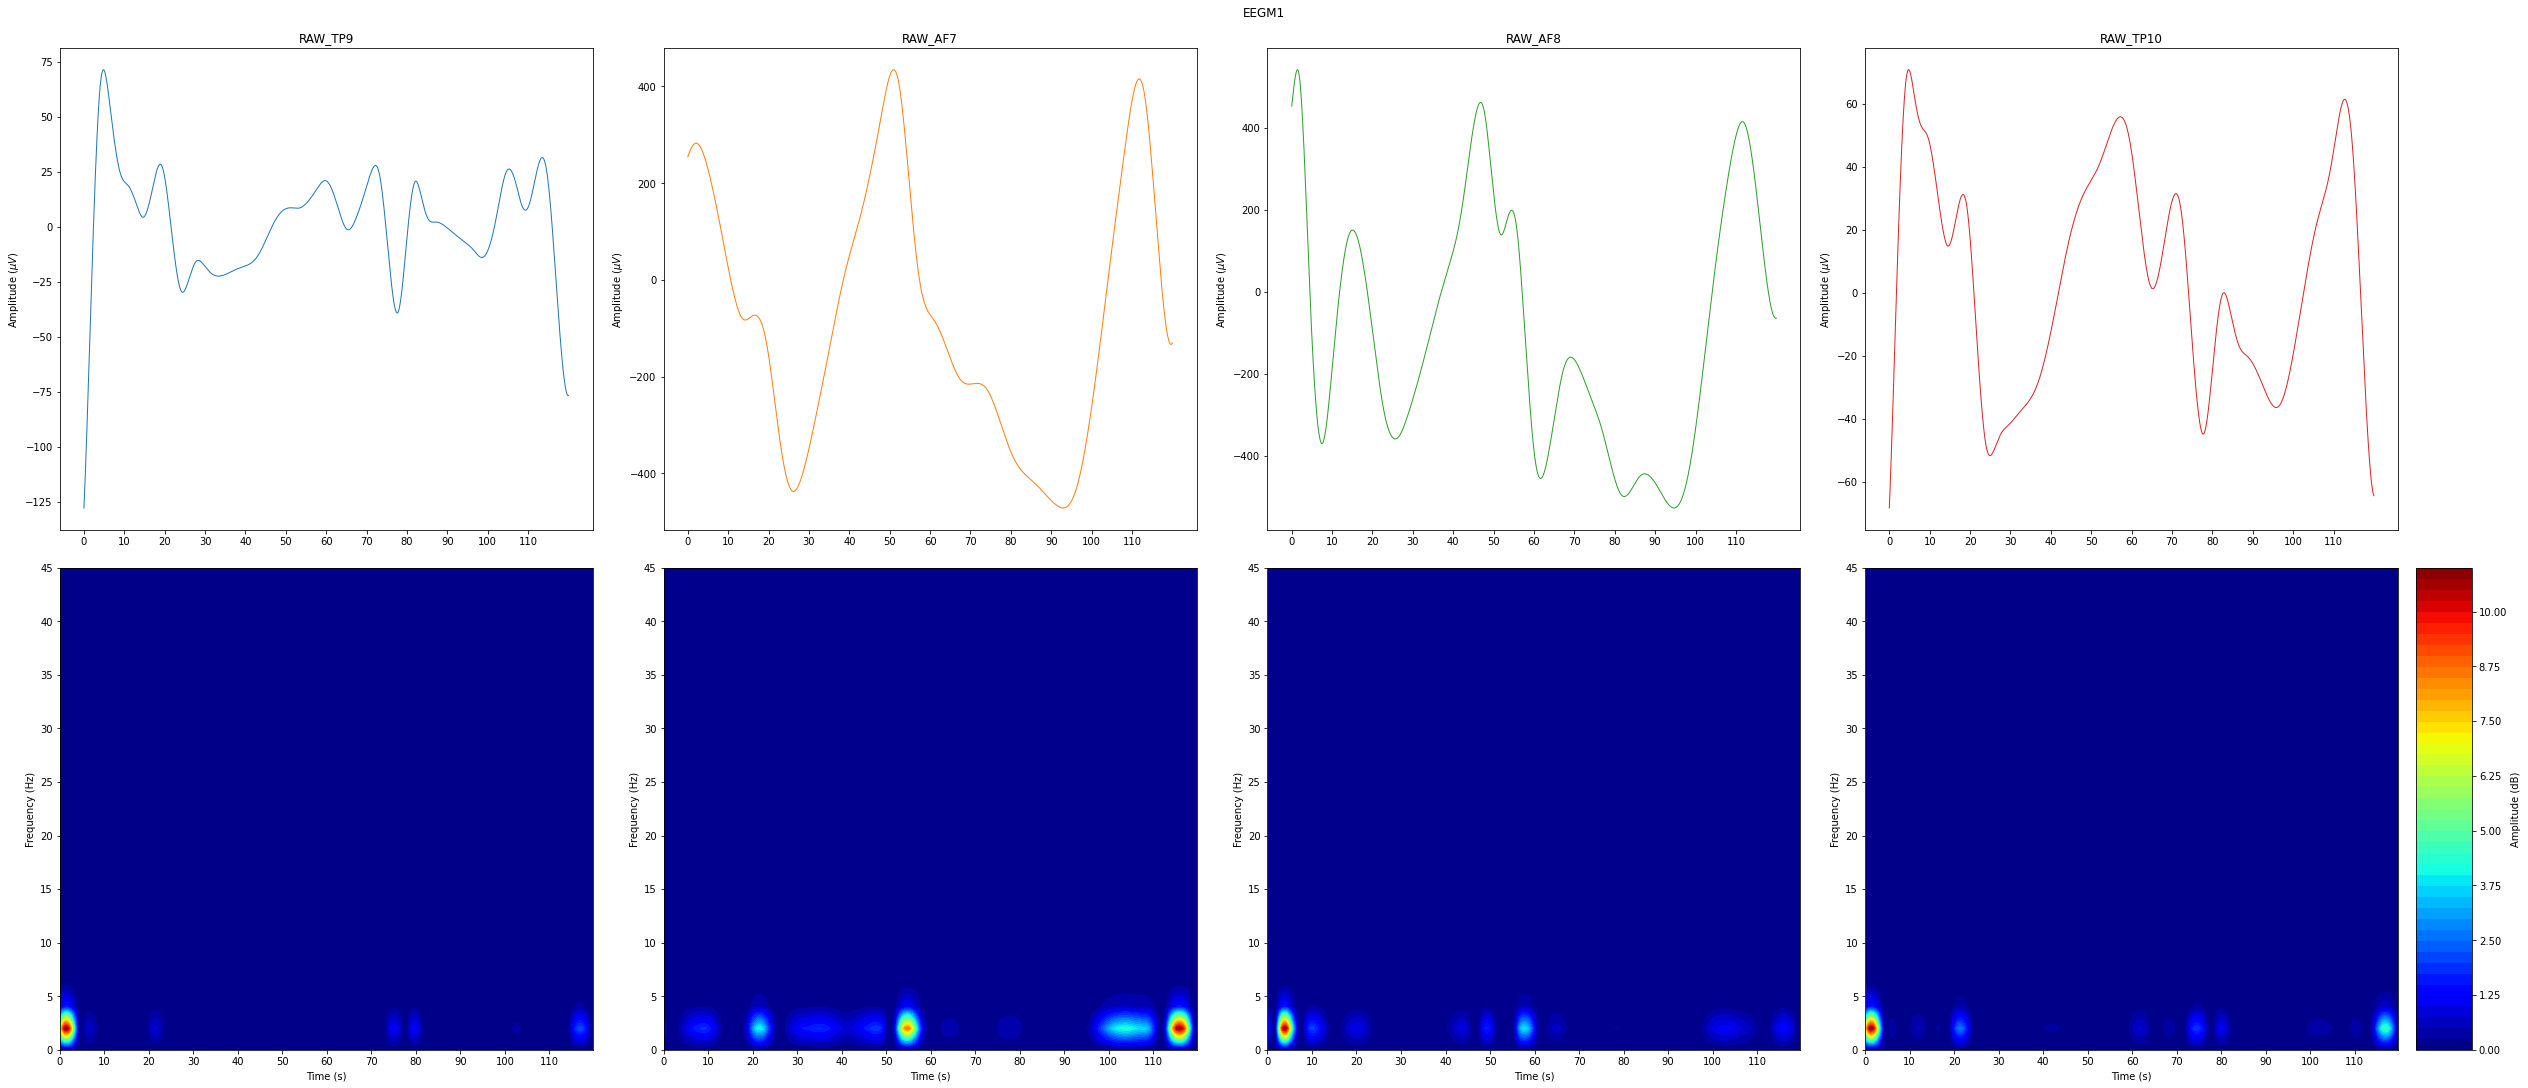

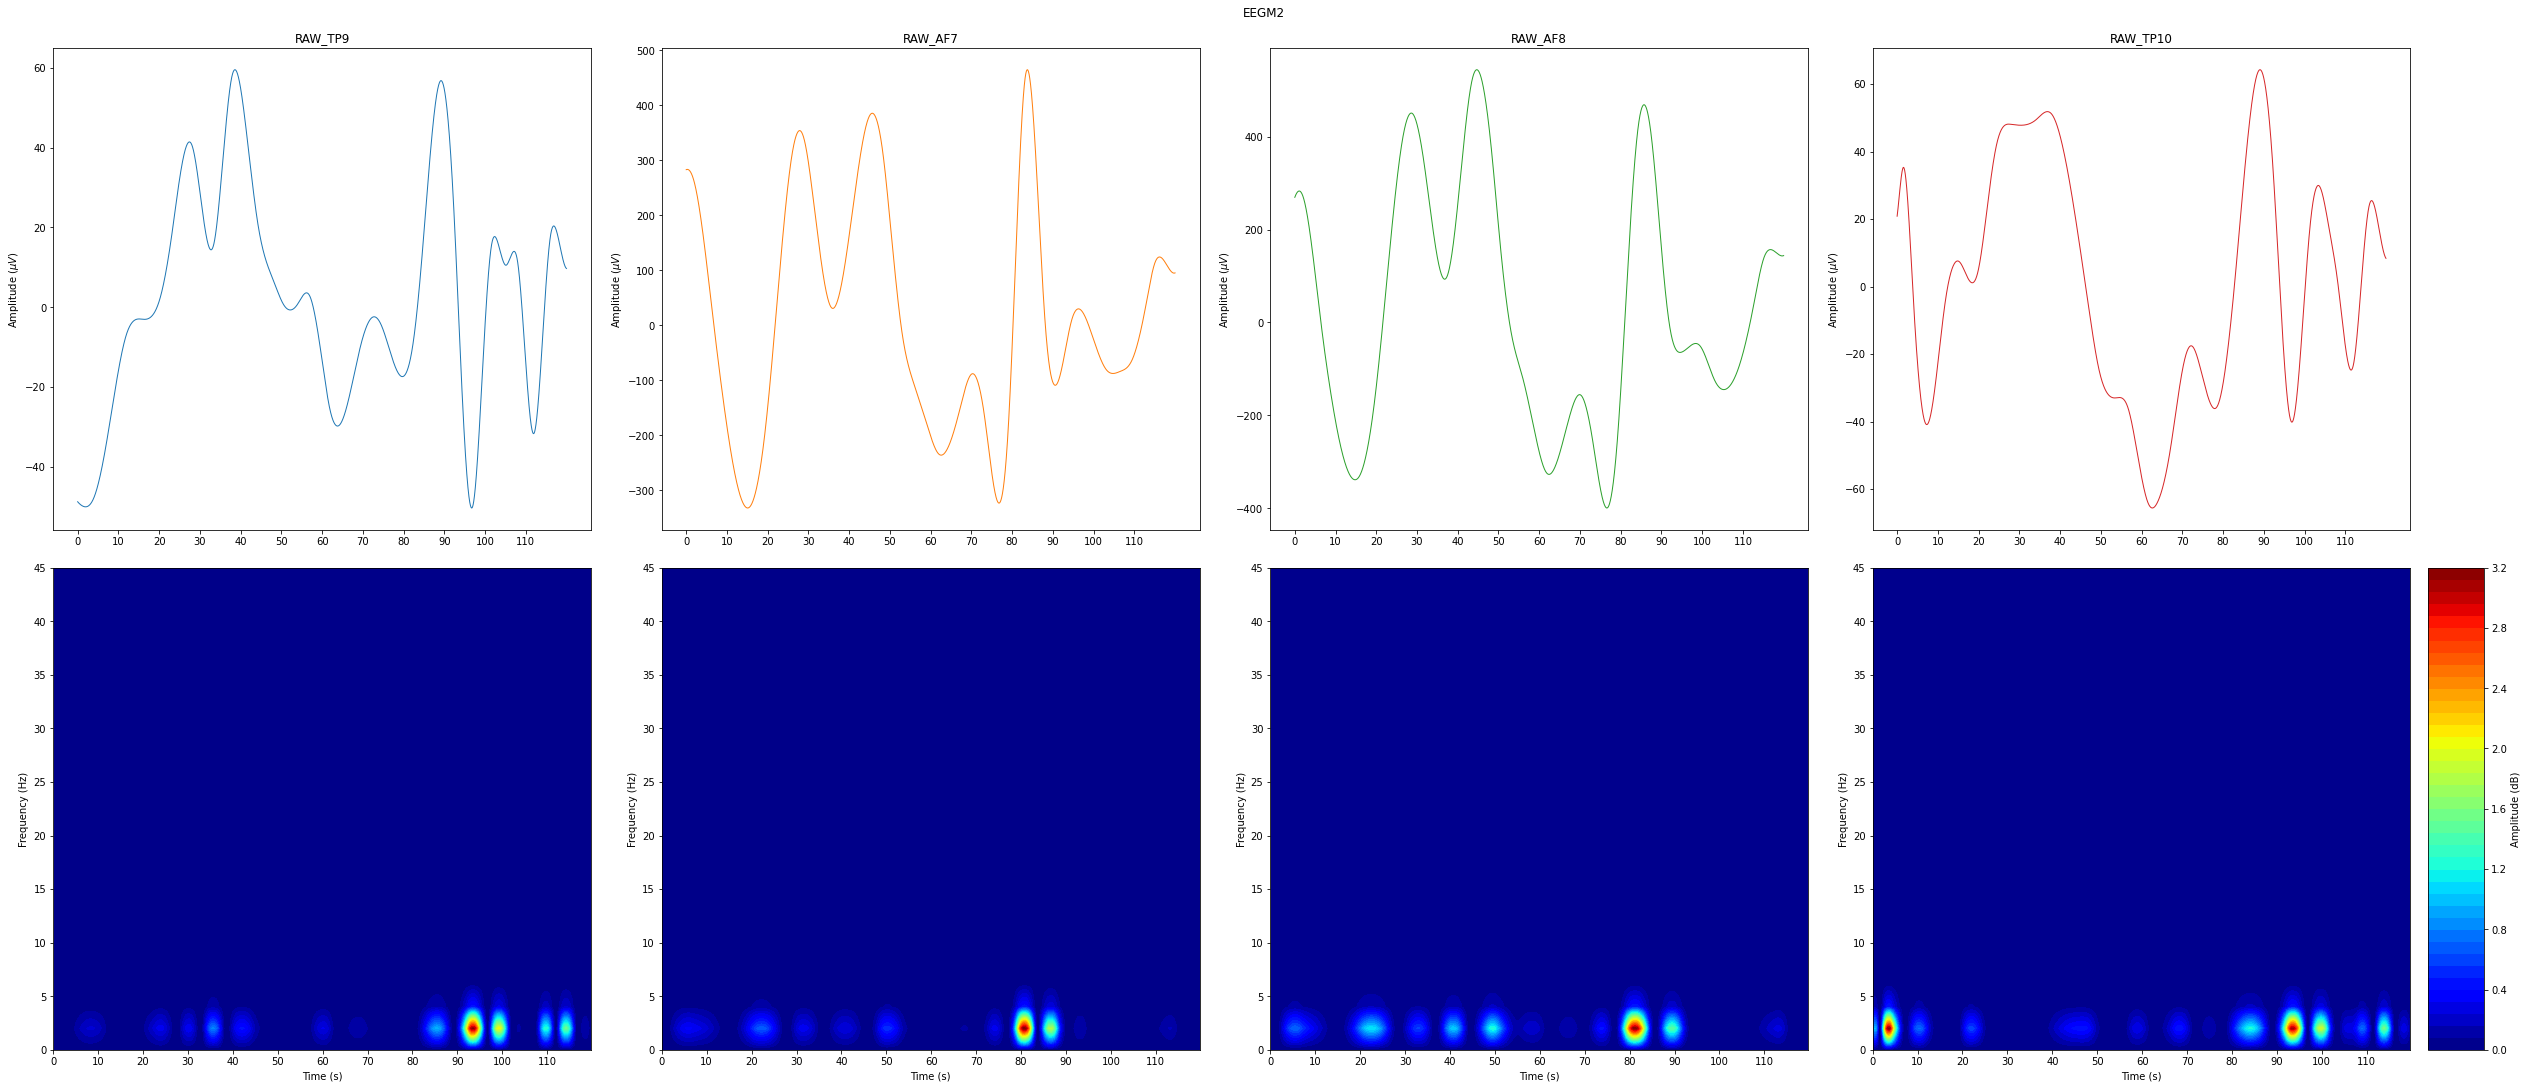

In [10]:
n_eegM1,n_eegM2 = EMD(eegM1,[2,3]),EMD(eegM2,[2,3])
plots(data=n_eegM1,time_s=time,fs=256,figsize=[35,15],subTitles=['RAW_TP9','RAW_AF7','RAW_AF8','RAW_TP10'],
            title='EEGM1',tickRange=[0,120],timeFrequencyDomainPlots=True)
plots(data=n_eegM2,time_s=time,fs=256,figsize=[35,15],subTitles=['RAW_TP9','RAW_AF7','RAW_AF8','RAW_TP10'],
            title='EEGM2',tickRange=[0,120],timeFrequencyDomainPlots=True)

In [11]:
m1_delta = avgBandPower(n_eegM1,256,0.5,4)
m2_delta = avgBandPower(n_eegM2,256,0.5,4)
m1_theta = avgBandPower(n_eegM1,256,4,8)
m2_theta = avgBandPower(n_eegM2,256,4,8)
m1_alpha = avgBandPower(n_eegM1,256,8,12)
m2_alpha = avgBandPower(n_eegM2,256,8,12)
m1_beta = avgBandPower(n_eegM1,256,12,30)
m2_beta = avgBandPower(n_eegM2,256,12,30)
m1_gamma = avgBandPower(n_eegM1,256,30,50)
m2_gamma = avgBandPower(n_eegM2,256,30,50)
print("Delta:",m1_delta,m2_delta)
print("Theta:",m1_theta,m2_theta)
print("Alpha:",m1_alpha,m2_alpha)
print("Beta:",m1_beta,m2_beta)
print("Gamma:",m1_gamma,m2_gamma)

Delta: [0.77223081 0.06735431 5.4905532  0.17164231] [7.97658251e-02 2.01564030e-01 3.39729272e-03 2.71236177e-05]
Theta: [5.80211086e-07 5.73551593e-08 1.05573572e-07 1.08171084e-10] [1.32336595e-09 1.43942187e-08 6.77583791e-09 6.53323490e-11]
Alpha: [4.25895603e-10 1.90663622e-08 3.48006334e-08 2.97231978e-11] [4.40777961e-10 4.68130435e-09 2.19562550e-09 2.08993866e-11]
Beta: [4.89002617e-10 2.31808059e-08 4.22276894e-08 3.51367425e-11] [5.35244118e-10 5.67800805e-09 2.66243426e-09 2.53703449e-11]
Gamma: [1.35496505e-10 6.54960381e-09 1.19252978e-08 9.83203344e-12] [1.51188873e-10 1.60333581e-09 7.51556497e-10 7.16540320e-12]
